## Introduction

About Zillow: Zillow's Economic Research Team collects, cleans and publishes housing and economic data from a variety of public and proprietary sources. Public property record data filed with local municipalities -- including deeds, property facts, parcel information and transactional histories -- forms the backbone of our data products, and is fleshed out with proprietary data derived from property listings and user behavior on Zillow.

In [250]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Loading the Dataset

In [251]:
County_time_series=pd.read_csv('./zillow_data/County_time_series.csv',parse_dates=True)
County_crosswalk=pd.read_csv('./zillow_data/CountyCrossWalk_Zillow.csv',parse_dates=True)
Data_dict=pd.read_csv('./zillow_data/DataDictionary.csv',parse_dates=True)
Metro=pd.read_csv('./zillow_data/Metro_time_series.csv',parse_dates=True)
Neighborhood=pd.read_csv('./zillow_data/Neighborhood_time_series.csv',parse_dates=True)
Zip_time_series=pd.read_csv('./zillow_data/Zip_time_series.csv',parse_dates=True)
df_city_time_seris = pd.read_csv('./zillow_data/City_time_series.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [252]:
State_time_series=pd.read_csv('./zillow_data/State_time_series.csv',parse_dates=True)
State_time_series.Date=pd.to_datetime(State_time_series.Date)
State_time_series['year'] = State_time_series.Date.dt.year
State_time_series.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,year
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN,1996
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN,1996
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN,1996
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN,1996
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN,1996


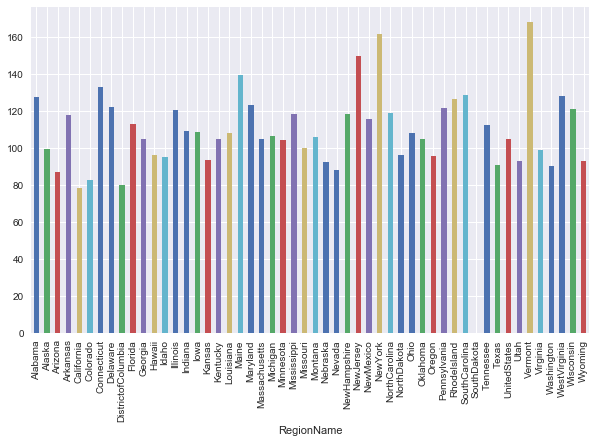

In [253]:
State_time_series.groupby(State_time_series.RegionName)['DaysOnZillow_AllHomes'].mean().plot(kind='bar',figsize=(10,6))

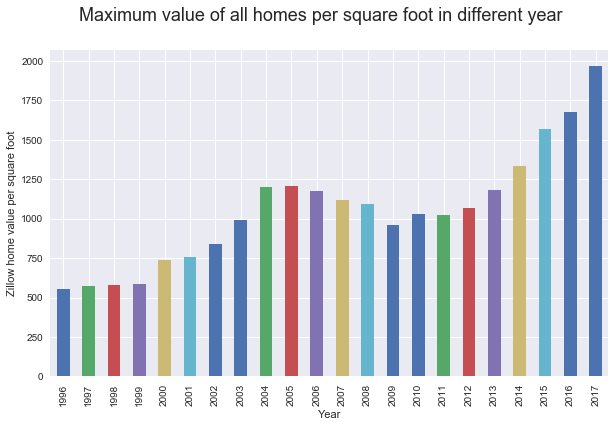

In [254]:
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes'].max().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Maximum value of all homes per square foot in different year', fontsize=18)
plt.ylabel('Zillow home value per square foot')
plt.xlabel('Year')
plt.show()

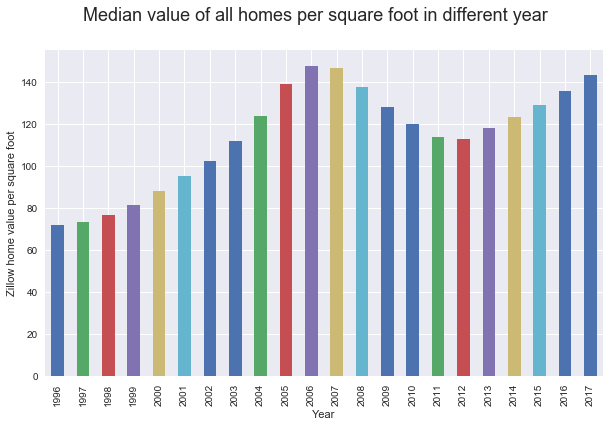

In [255]:
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Median value of all homes per square foot in different year', fontsize=18)
plt.ylabel('Zillow home value per square foot')
plt.xlabel('Year')
plt.show()

In [256]:
def priceOverTime(data,label):
    """Plot price over time"""
    data.groupby(df_city_time_seris.Date.dt.year)['MedianListingPrice_AllHomes'].mean().plot(kind='bar', figsize=(10, 6), color='grey', edgecolor = 'black', linewidth = 2)
    plt.suptitle(label, fontsize=12)
    plt.ylabel('MedianSoldPrice_AllHomes')
    plt.xlabel('Year')
    plt.show()

In [257]:
States = ['California','Colorado','Michigan']
states_names = df_city_time_seris.loc[df_city_time_seris['RegionName'].isin(States)]
newdf3 = states_names.loc[df_city_time_seris['RegionName'] == 'California']
newdf4 = states_names.loc[df_city_time_seris['RegionName'] == 'Colorado']
newdf5 = states_names.loc[df_city_time_seris['RegionName'] == 'Michigan']


/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Text(0,0.5,'Price')

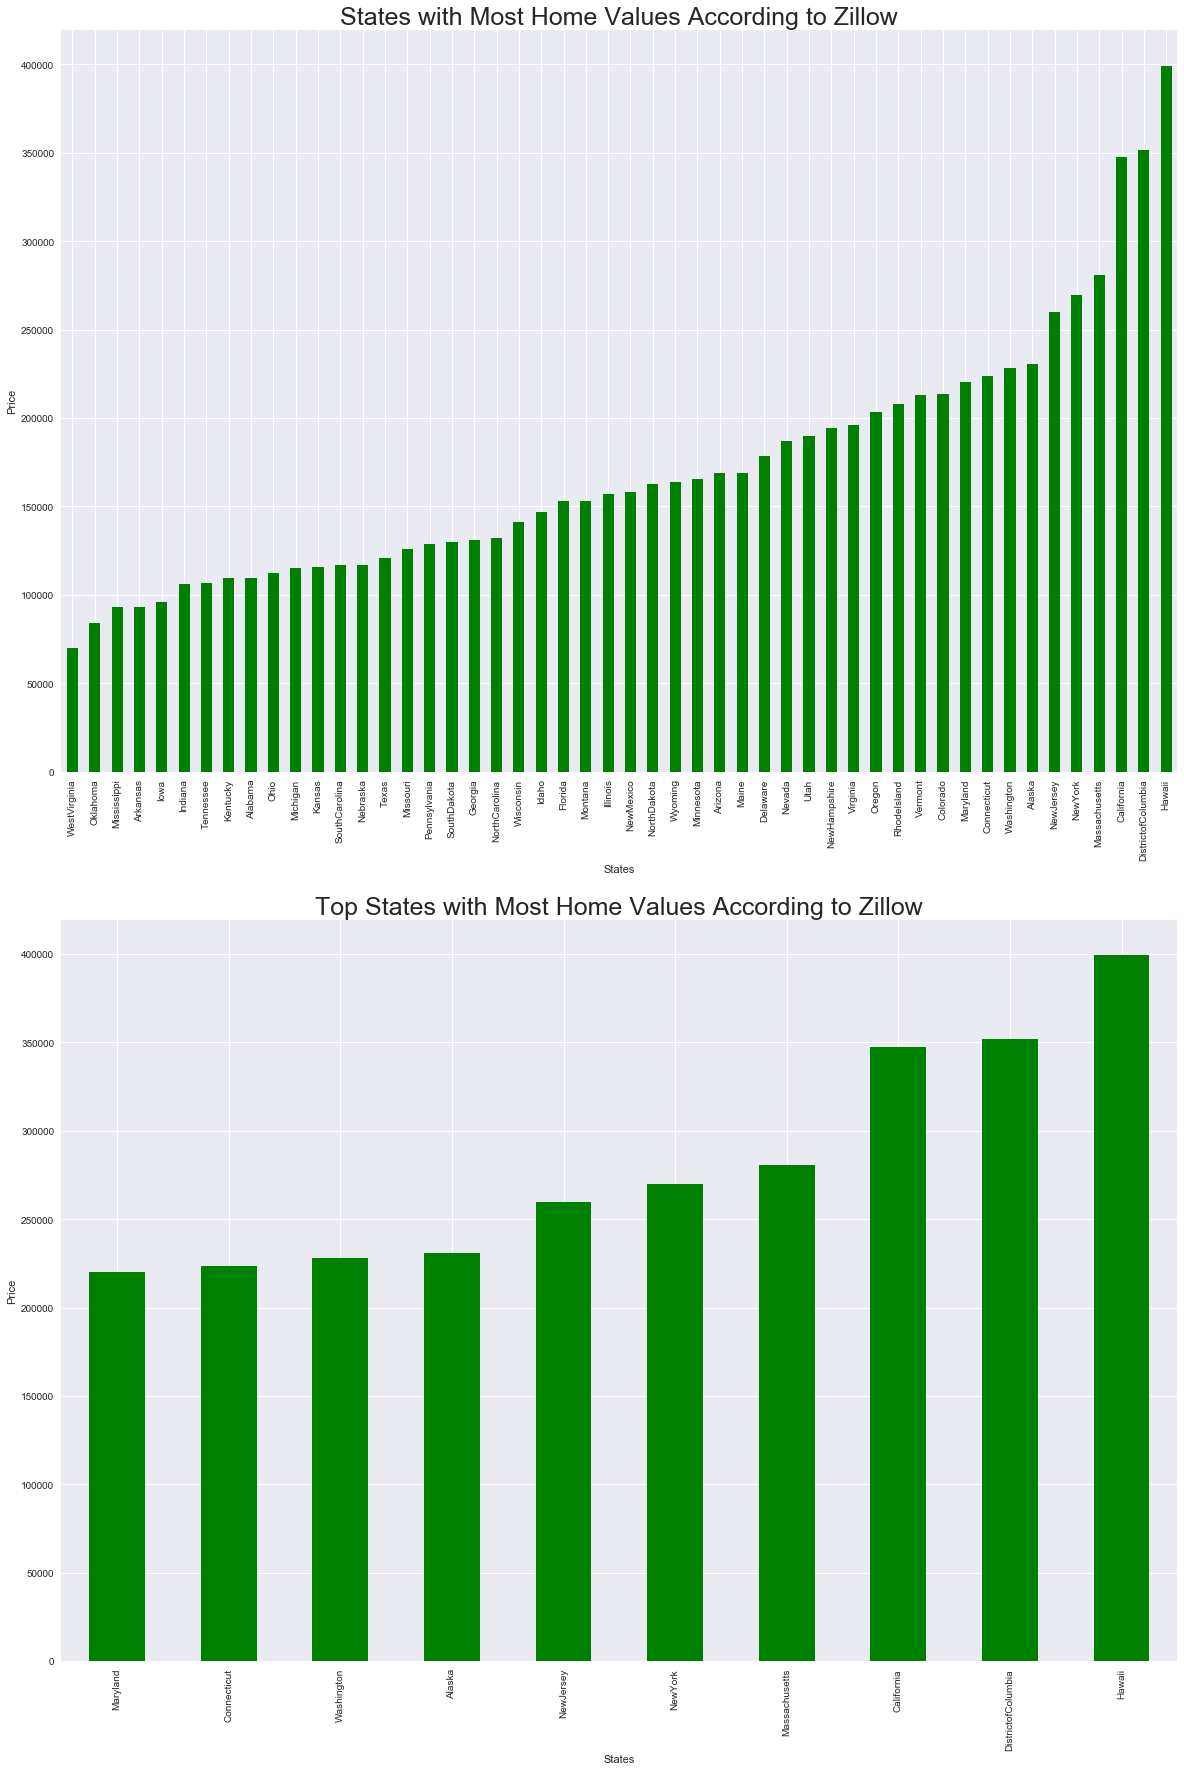

In [259]:
f, ax = plt.subplots(2,1, figsize=(20, 30))
state_without_null = State_time_series.dropna(subset=['ZHVI_AllHomes'], how='any') ## getting rid of null values
state_without_null.Date = state_without_null.Date.dt.year ## set date to year.

state_without_null.groupby(state_without_null.RegionName)['ZHVI_AllHomes'].mean().sort_values().plot( kind = 'bar', ax =ax[0], color = 'g')
ax[0].set_title('States with Most Home Values According to Zillow', fontsize = 25)
ax[0].set_xlabel('States')
ax[0].set_ylabel('Price')


state_without_null.groupby(state_without_null.RegionName)['ZHVI_AllHomes'].mean().sort_values().tail(10).plot(kind = 'bar',ax =ax[1], color = 'g')
ax[1].set_title('Top States with Most Home Values According to Zillow', fontsize = 25)
ax[1].set_xlabel('States')
ax[1].set_ylabel('Price')

In [260]:
top_states = state_without_null[(state_without_null.RegionName == "NewYork")|
                   (state_without_null.RegionName == "Washington")|
                   (state_without_null.RegionName == "Colorado")|
                   (state_without_null.RegionName == "Connecticut")|
                   (state_without_null.RegionName == "Maryland")|
                   (state_without_null.RegionName == "NewJersey")|
                   (state_without_null.RegionName == "Alaska")|
                   (state_without_null.RegionName == "Massachusetts")|
                   (state_without_null.RegionName == "California")|
                   (state_without_null.RegionName == "Hawaii")|
                   (state_without_null.RegionName == "DistrictofColumbia")]

Text(0.5,1,' ZHVI home values change in overtime for top expensive states')

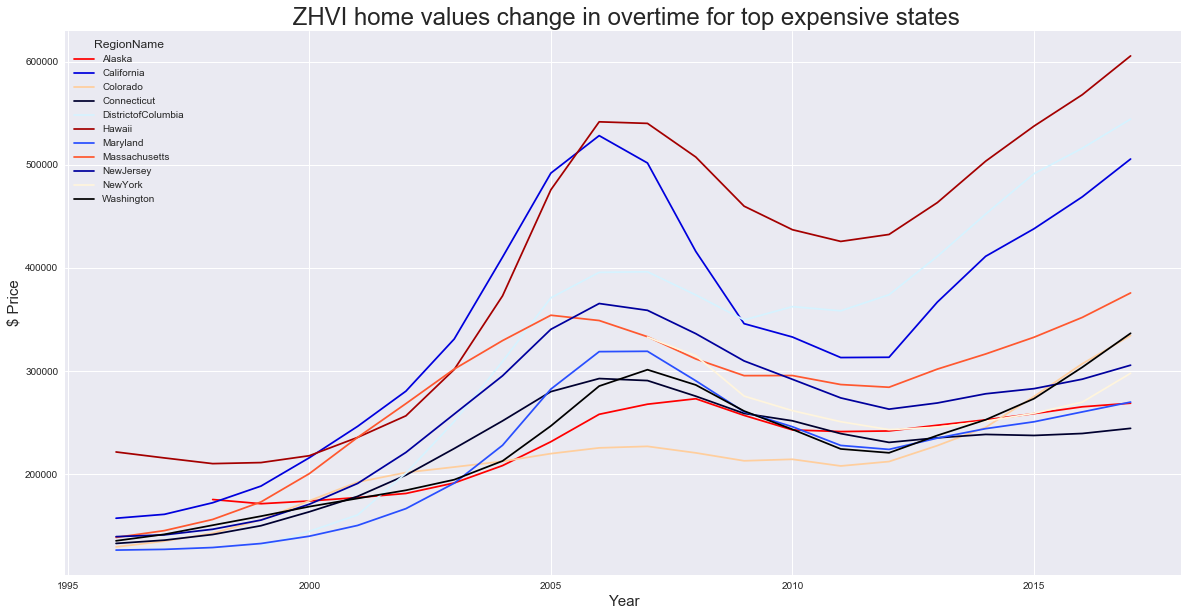

In [261]:
pd.pivot_table(top_states, 
               index="Date", 
               columns="RegionName", 
               values="ZHVI_AllHomes").plot(kind = 'line', figsize = (20,10),colormap='flag', legend = True)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("$ Price",  fontsize = 15)
plt.title(" ZHVI home values change in overtime for top expensive states", fontsize = 24)

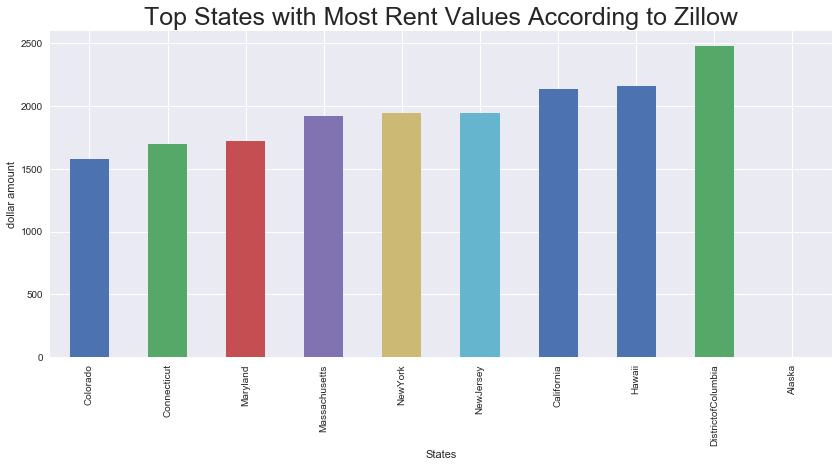

In [262]:
plt.subplots(figsize = (14,6))
state_without_null.groupby(state_without_null.RegionName)['ZRI_AllHomes'].mean().sort_values().tail(10).plot(kind = 'bar')
plt.title('Top States with Most Rent Values According to Zillow', fontsize = 25)
plt.xlabel('States')
plt.ylabel('dollar amount');

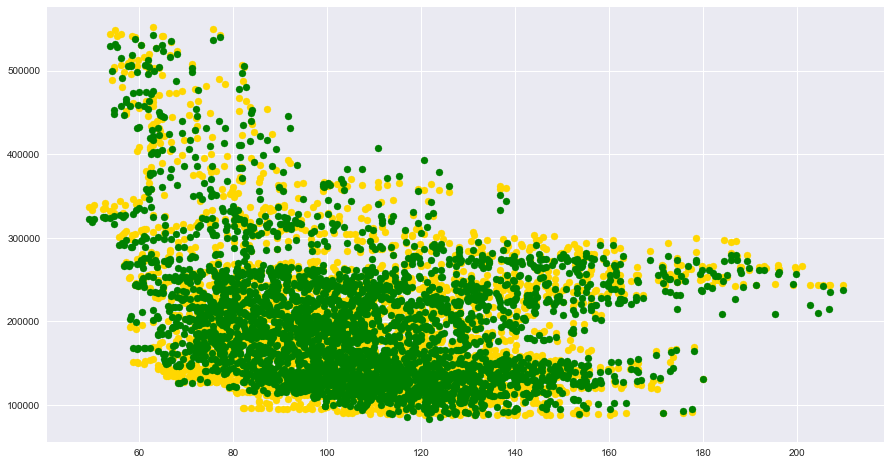

In [263]:
states = set(State_time_series[
    ~State_time_series['ZHVI_AllHomes'].isnull() &
    ~State_time_series['Sale_Prices'].isnull()
                      ]['RegionName'].values)

State_time_series_year = State_time_series[State_time_series['RegionName'].isin(states)].copy()
plt.figure(figsize=(15,8));

plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.ZHVI_AllHomes, c="gold");
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.Sale_Prices, c ="green");

## Machine Learning part here


In [264]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

Since the data has lot of Nan values so we will be using only the last 4000 rows where we have most of the data filled up.

In [265]:
state_data = State_time_series.tail(4000)
state_data = state_data[['DaysOnZillow_AllHomes','MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence','ZHVIPerSqft_AllHomes', 'PctOfHomesDecreasingInValues_AllHomes',
       'PctOfHomesIncreasingInValues_AllHomes',
       'PctOfHomesSellingForGain_AllHomes',
       'PctOfHomesSellingForLoss_AllHomes',
       'PctOfListingsWithPriceReductionsSeasAdj_AllHomes',
       'PctOfListingsWithPriceReductionsSeasAdj_CondoCoop',
       'PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence',
       'PctOfListingsWithPriceReductions_AllHomes',
       'PctOfListingsWithPriceReductions_CondoCoop',
       'PctOfListingsWithPriceReductions_SingleFamilyResidence',
       'PriceToRentRatio_AllHomes', 'Sale_Counts', 'Sale_Counts_Seas_Adj',
       'Sale_Prices']]

### Selecting features 

In [266]:
state_data.isna().sum()

DaysOnZillow_AllHomes                                             127
MedianListingPricePerSqft_1Bedroom                               1006
MedianListingPricePerSqft_2Bedroom                                285
MedianListingPricePerSqft_3Bedroom                                250
MedianListingPricePerSqft_4Bedroom                                218
MedianListingPricePerSqft_5BedroomOrMore                          269
MedianListingPricePerSqft_AllHomes                                221
MedianListingPricePerSqft_CondoCoop                               558
MedianListingPricePerSqft_DuplexTriplex                           719
MedianListingPricePerSqft_SingleFamilyResidence                   237
ZHVIPerSqft_AllHomes                                              153
PctOfHomesDecreasingInValues_AllHomes                            1231
PctOfHomesIncreasingInValues_AllHomes                            1231
PctOfHomesSellingForGain_AllHomes                                3778
PctOfHomesSellingFor

As we can see that there are lot of missing values in each column. First of all, we will drop the rows with missing sale price values. The reason we do not want to impute the median or mean value in sale price columns is that some of the houses are 3 bedroom, 2 bedroom or 1 bedroom. We also do not have zipcode of those houses so we cannot impute average in that column. We know that some of the areas in country are very expensive compare to other areas. 

We could use state ot county data to figure out the average home sale price. We do not have sufficient data to do that. Once we filtered the data using states then we barely get hundered of rows.

For the rest of columns, we have estimated 20-30% of Nan values and we will use mean to impute those missing values.

In [267]:
clean_data = state_data.drop(['PctOfHomesSellingForGain_AllHomes','PctOfHomesSellingForLoss_AllHomes'],axis=1)
clean_data.dropna(how='all',inplace=True)
clean_data.dropna(subset=['Sale_Prices'],inplace= True)
clean_data = clean_data.groupby(clean_data.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
clean_data.DaysOnZillow_AllHomes.fillna(clean_data.DaysOnZillow_AllHomes.mean(),inplace=True)
clean_data.head()

,DaysOnZillow_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,...,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices
9213,95.250,186.485125,137.428361,130.948422,135.870992,142.842347,138.431968,168.728363,168.640239,135.079420,...,13.199955,14.444883,12.947046,14.685757,15.307939,14.558914,13.10,36774.0,31471.0,245000.0
9214,101.500,201.417004,139.594972,130.628757,142.200599,160.192525,143.979058,165.985700,140.150479,142.527109,...,12.282931,12.143330,12.291848,15.218636,13.846773,15.403070,12.01,7324.0,5722.0,195100.0
9215,122.500,159.190378,149.375000,162.416667,166.137371,167.482818,165.348101,146.977124,83.913043,169.171110,...,14.938644,14.059923,15.141557,15.409220,14.089132,15.697873,11.98,2152.0,1857.0,229400.0
9216,131.625,186.485125,118.747396,110.204082,110.438095,117.156250,115.413534,145.114461,99.382716,114.636297,...,14.423764,10.735921,14.677979,15.013405,10.697674,15.297479,11.79,563.0,492.0,173200.0
9217,99.125,448.507931,137.428361,130.948422,135.870992,142.842347,334.681204,436.943620,101.505648,262.250454,...,12.429007,12.942694,12.033546,11.798906,12.046332,11.602210,12.74,493.0,426.0,362300.0


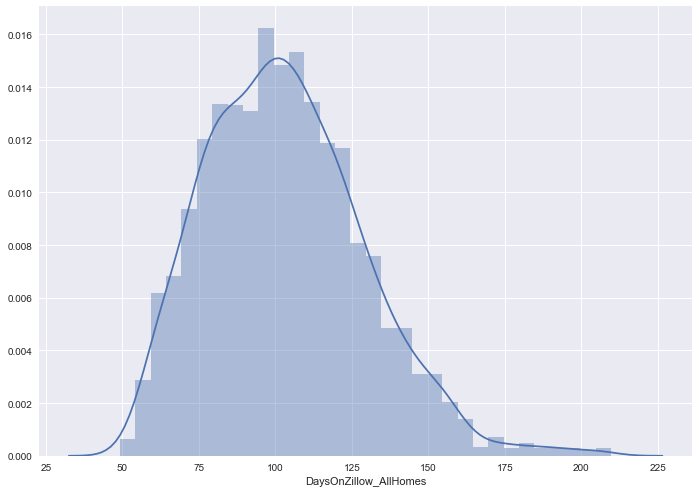

In [268]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(clean_data['DaysOnZillow_AllHomes'])
plt.show()

#### Inspecting distribution of the target feature

We investigated that if our target feature is normally distributed or no. In case, it is not normally distributed we can normalize the data. However, our target feature is normally distributed.

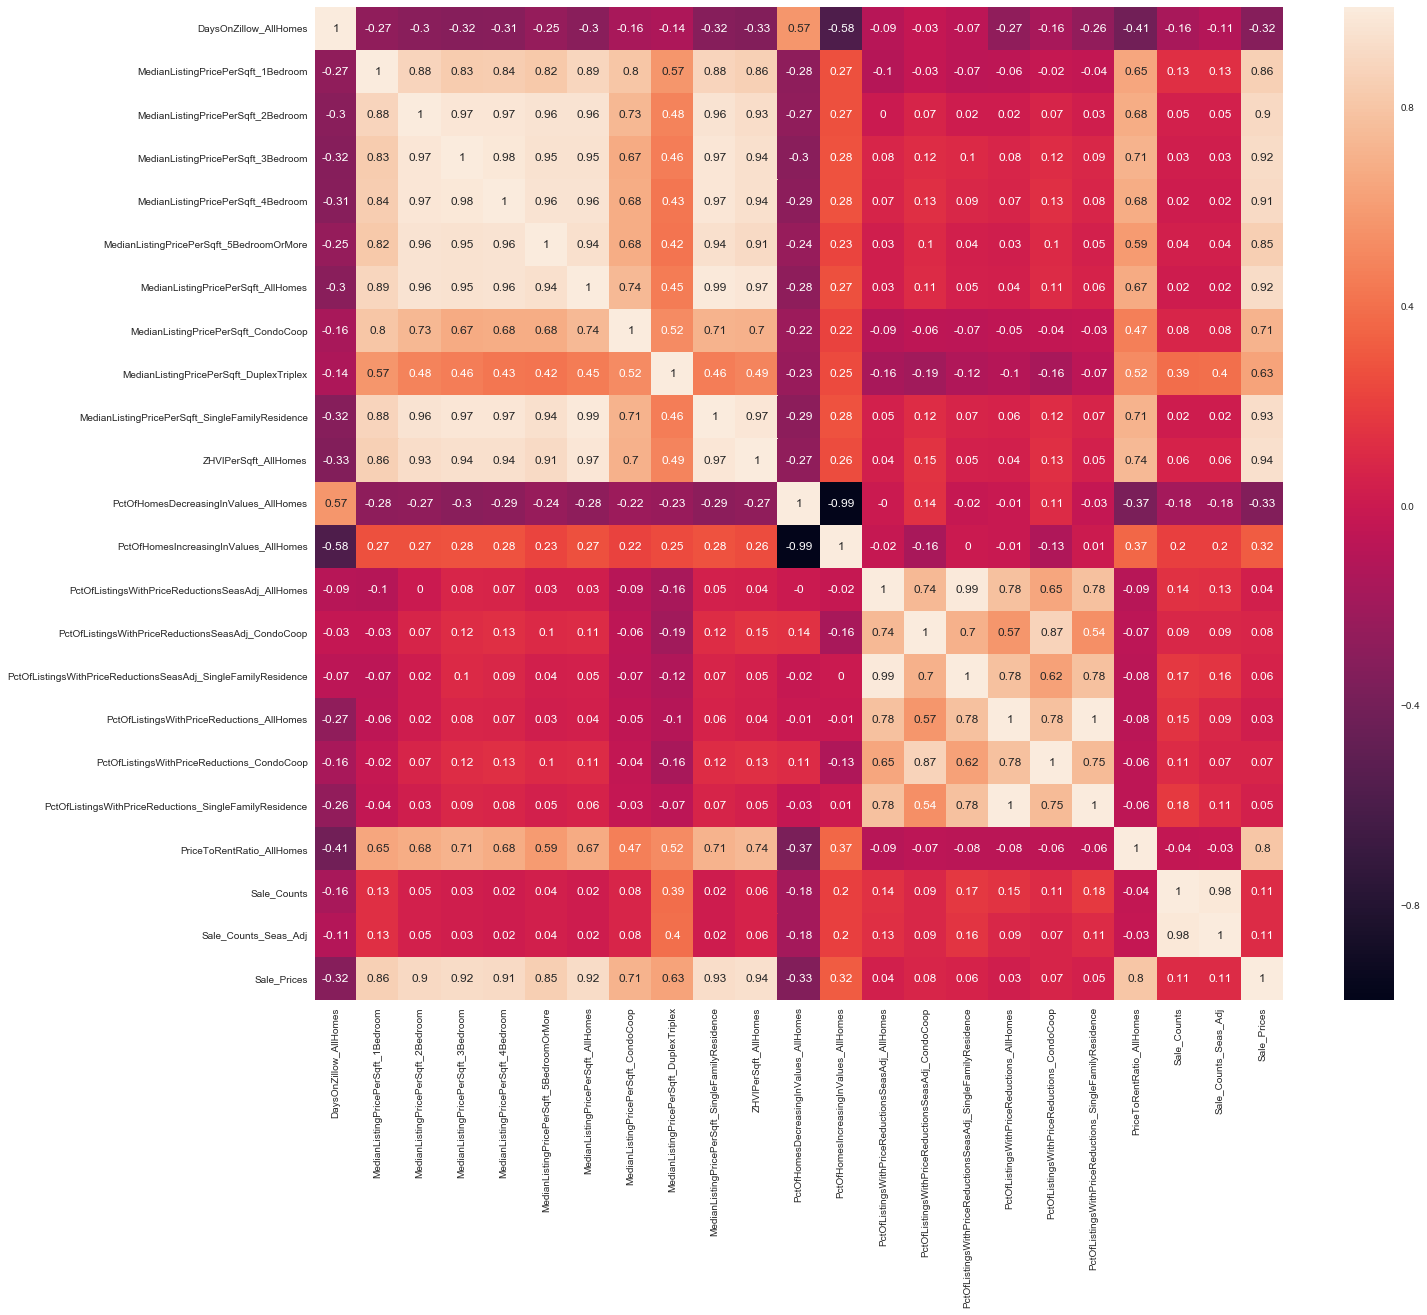

In [269]:
sns.set(rc={'figure.figsize':(21.7,18.27)})
correlation_matrix = clean_data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Correlation 

We can see that data does not have much correlation with the target feature. There is only one feature with 0.57 correlation with the target feature. 

## Linear Regression

In [270]:
clean_data.head()

,DaysOnZillow_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,...,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices
9213,95.250,186.485125,137.428361,130.948422,135.870992,142.842347,138.431968,168.728363,168.640239,135.079420,...,13.199955,14.444883,12.947046,14.685757,15.307939,14.558914,13.10,36774.0,31471.0,245000.0
9214,101.500,201.417004,139.594972,130.628757,142.200599,160.192525,143.979058,165.985700,140.150479,142.527109,...,12.282931,12.143330,12.291848,15.218636,13.846773,15.403070,12.01,7324.0,5722.0,195100.0
9215,122.500,159.190378,149.375000,162.416667,166.137371,167.482818,165.348101,146.977124,83.913043,169.171110,...,14.938644,14.059923,15.141557,15.409220,14.089132,15.697873,11.98,2152.0,1857.0,229400.0
9216,131.625,186.485125,118.747396,110.204082,110.438095,117.156250,115.413534,145.114461,99.382716,114.636297,...,14.423764,10.735921,14.677979,15.013405,10.697674,15.297479,11.79,563.0,492.0,173200.0
9217,99.125,448.507931,137.428361,130.948422,135.870992,142.842347,334.681204,436.943620,101.505648,262.250454,...,12.429007,12.942694,12.033546,11.798906,12.046332,11.602210,12.74,493.0,426.0,362300.0


Text(0.5,1,'Predicted days on Zillow')

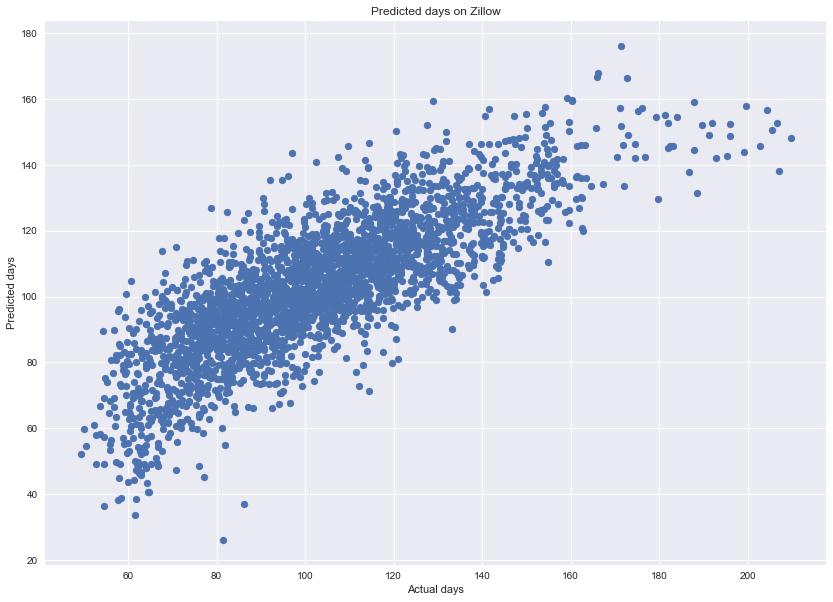

In [313]:
lRegr = LinearRegression()
X = clean_data.drop('DaysOnZillow_AllHomes',axis=1)
y = clean_data['DaysOnZillow_AllHomes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lRegr.fit(X, y)
plt.figure(figsize=(14,10))
plt.scatter(clean_data.DaysOnZillow_AllHomes ,lRegr.predict(new_dat1))
plt.xlabel("Actual days")
plt.ylabel("Predicted days")
plt.title("Predicted days on Zillow")

## Accuracy of Linear Model

As we inspected that the data dont have linear shape. Our linear regression model didnt perform very well. The accuracy score is only 63%. 

In [276]:
accuracy = lRegr.score(X_test,y_test)
print(accuracy*100,'%')

63.80545764002012 %


In [277]:
linear_coef = pd.DataFrame({'Features' :new_dat1.columns,'Coef':lRegr.coef_})
linear_coef

,Features,Coef
0,MedianListingPricePerSqft_1Bedroom,-0.001852
1,MedianListingPricePerSqft_2Bedroom,-0.165170
2,MedianListingPricePerSqft_3Bedroom,0.412055
3,MedianListingPricePerSqft_4Bedroom,-0.062287
4,MedianListingPricePerSqft_5BedroomOrMore,0.066120
5,MedianListingPricePerSqft_AllHomes,0.736287
6,MedianListingPricePerSqft_CondoCoop,0.004008
7,MedianListingPricePerSqft_DuplexTriplex,0.067227
8,MedianListingPricePerSqft_SingleFamilyResidence,-0.999974
9,ZHVIPerSqft_AllHomes,-0.140708


## Random Forest 

Random forest usually performs very well on non linear data. 

In [278]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_test,y_test);
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
accuracy = rf.score(X_test,y_test)
print(accuracy*100,'%')

97.64690808042826 %


### Converting the Target into classification

We can try to figure out that if the home is going to list for sale on site above average days or below average days.

For that, we have to transform out target feature. We will figure out the average days and then impute 0 for below average and 1 for above average. For classification problem, we can use logistic regression or random forest classifier.

In [281]:
classification_data = clean_data.copy()
classification_data.DaysOnZillow_AllHomes[classification_data['DaysOnZillow_AllHomes'] <=101]=0
classification_data.DaysOnZillow_AllHomes[classification_data['DaysOnZillow_AllHomes'] >101]=1

In [315]:
average = clean_data.DaysOnZillow_AllHomes.mean()
maximum = clean_data.DaysOnZillow_AllHomes.max()
minimum = clean_data.DaysOnZillow_AllHomes.min()
min_max = [minimum,average,maximum]
names = ['Minimum','Average', 'Maximum']

([<matplotlib.axis.XTick at 0x1eeff27f0>,
 <a list of 3 Text xticklabel objects>)

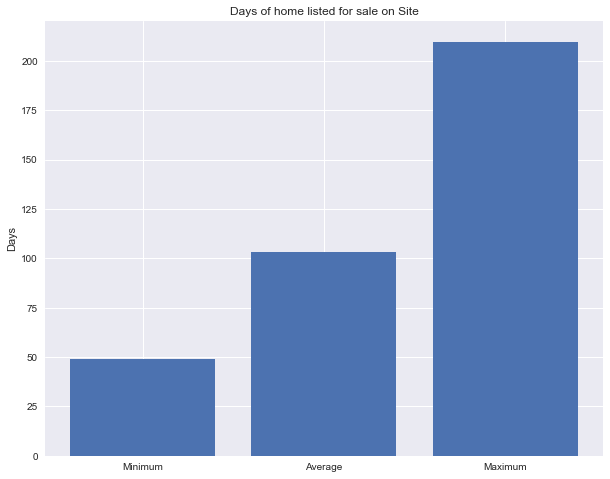

In [319]:
plt.figure(figsize=(10,8))
y_pos = np.arange(3)
plt.bar(y_pos, min_max)
plt.ylabel("Days")
plt.title("Days of home listed for sale on Site")
plt.xticks(np.arange(3),('Minimum','Average' ,'Maximum'))

## Logistic Regression

In [291]:
logRegr = LogisticRegression()
X = classification_data.drop('DaysOnZillow_AllHomes',axis=1)
y =  classification_data['DaysOnZillow_AllHomes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
logRegr.fit(X, y)
predictions = logRegr.predict(X_test)
# Calculate the absolute errors
accuracy = logRegr.score(X_test,y_test)
print(accuracy*100,'%')

80.24691358024691 %


As we can see that Logistic regression's accuracy score is 80% comapre to Linear regression model.

However, this dataset does not have much correlation features to predict the days that home is going to stay on the site. We need such information such as zipcode, size of home, bedrooms, bathrooms, yearbuilt. 



## Random Forest Classifier

In [290]:
X = classification_data.drop('DaysOnZillow_AllHomes',axis=1)
y = classification_data['DaysOnZillow_AllHomes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_test,y_test);
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
accuracy = rf.score(X_test,y_test)
print(accuracy*100,'%')

100.0 %
